In [6]:
!pip install -q gluoncv

In [7]:
!pip install mxnet

     |████████████████████████████████| 68.7MB 59kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [8]:
from gluoncv import model_zoo
from gluoncv.data.transforms.presets import imagenet , yolo
from gluoncv.utils.viz import image , plot_bbox
import matplotlib.pyplot as plt
from mxnet.image import imread 

#  Downloading a Pretrained Model



In [9]:
net = model_zoo.get_model('yolo3_darknet53_voc', pretrained=True)

223070KB [00:06, 33895.72KB/s]                            


# Pre-processing an **Image**

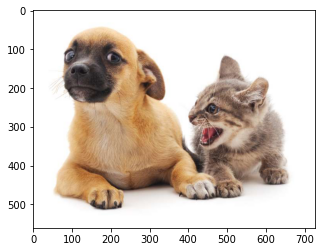

In [16]:
test_image = '/content/catdog.png'
im_fname = imread(test_image)
image.plot_image(im_fname)

In [23]:
x , img = yolo.load_test(test_image)
print('shape of preprocessed image:' , x.shape) 

shape of preprocessed image: (1, 3, 416, 540)


# Inference and **Visualizing**

In [25]:
class_IDs , scores , bounding_boxs = net(x)

for c ,s in zip(class_IDs.reshape(-1) , scores.reshape(-1)):
    if s.asscalar() < 0.8:
       break
    print("Class ID: {} " .format(c.asscalar()) ,"score : {}" .format(s.asscalar()))



Class ID: 11.0  score : 0.9946417808532715
Class ID: 7.0  score : 0.9910183548927307


##### for the better visualize outputs bounding boxes in the test image 
######  glouncv.utils.viz.plot_bbox()*italicized text*



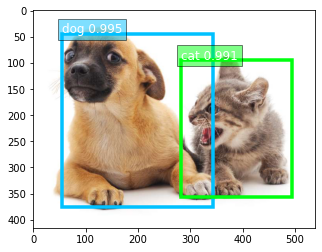

In [27]:
ax = plot_bbox(img , bounding_boxs[0] , scores[0] , class_IDs[0] ,class_names=net.classes)
plt.show()

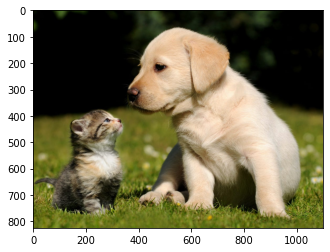

In [30]:
test_image1 = '/content/5e4c06974b661b4bd70a1562.jpg'
im_fname = imread(test_image1)
image.plot_image(im_fname)

In [31]:
x , img = yolo.load_test(test_image1)
print('shape of preprocessed image:' , x.shape) 

shape of preprocessed image: (1, 3, 416, 555)


In [32]:
class_IDs , scores , bounding_boxs = net(x)

for c ,s in zip(class_IDs.reshape(-1) , scores.reshape(-1)):
    if s.asscalar() < 0.8:
       break
    print("Class ID: {} " .format(c.asscalar()) ,"score : {}" .format(s.asscalar()))


Class ID: 11.0  score : 0.9978341460227966


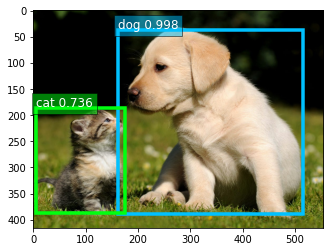

In [33]:
ax = plot_bbox(img , bounding_boxs[0] , scores[0] , class_IDs[0] ,class_names=net.classes)
plt.show()

# *Checking the another image* 

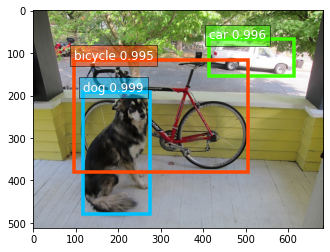

In [36]:
dog_bike = '/content/bikedog.jpg'

dog_bike_raw ,dog_bike_img = yolo.load_test(dog_bike , short=512)

dog_bike_class_IDs , dog_bike_scores , dog_bike_bounding_boxs = net(dog_bike_raw)

ax = plot_bbox(dog_bike_img ,dog_bike_bounding_boxs[0] , dog_bike_scores[0],
               dog_bike_class_IDs[0] , class_names = net.classes)

plt.show()
